# How to inspect model fit results

In [2]:
from rlssm.utility.utils import load_model_results

# load non-hierarchical DDM fit:
model_fit_ddm = load_model_results('DDM.pkl')

# load non-hierarchical LBA fit:
model_fit_lba = load_model_results('LBA_2A.pkl')

# load hierarchical RL fit:
model_fit_rl = load_model_results('hierRL_2A.pkl')

## Posteriors

The posterior samples are stored in `samples`:

In [3]:
model_fit_ddm.samples

,transf_drift,transf_threshold,transf_ndt
0,0.717709,1.19665,0.252328
1,0.862188,1.27886,0.240830
2,0.677173,1.29392,0.245740
3,0.845948,1.27007,0.242185
4,0.630892,1.23442,0.242828
...,...,...,...
3995,0.623901,1.26809,0.245883
3996,1.032070,1.24095,0.249789
3997,0.817378,1.24481,0.250297
3998,0.612785,1.24213,0.248828


In [4]:
model_fit_rl.samples.describe()

,transf_mu_alpha,transf_mu_sensitivity,alpha_sbj[1],alpha_sbj[2],alpha_sbj[3],alpha_sbj[4],alpha_sbj[5],alpha_sbj[6],alpha_sbj[7],alpha_sbj[8],...,sensitivity_sbj[18],sensitivity_sbj[19],sensitivity_sbj[20],sensitivity_sbj[21],sensitivity_sbj[22],sensitivity_sbj[23],sensitivity_sbj[24],sensitivity_sbj[25],sensitivity_sbj[26],sensitivity_sbj[27]
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.214249,0.457826,0.118764,0.040489,0.151461,0.127157,0.226088,0.172311,0.104653,0.277969,...,0.185939,0.221454,0.346289,0.674229,0.588112,0.731539,0.379161,0.400781,0.202393,0.253733
std,0.025522,0.032404,0.049736,0.052076,0.068048,0.052428,0.080731,0.086851,0.033651,0.122217,...,0.141403,0.037154,0.051928,0.131797,0.110670,0.151292,0.063514,0.142466,0.116487,0.061875
min,0.142302,0.357274,0.013515,0.003605,0.006582,0.013048,0.030101,0.016365,0.028384,0.030795,...,0.027643,0.127073,0.213504,0.341765,0.319400,0.344394,0.189188,0.174441,0.036081,0.124421
25%,0.196320,0.435416,0.082543,0.018560,0.103149,0.088693,0.168907,0.105195,0.081160,0.181664,...,0.075370,0.196641,0.309365,0.584314,0.513500,0.621587,0.334911,0.297599,0.115723,0.211779
50%,0.213179,0.456558,0.112714,0.026869,0.142702,0.119975,0.221424,0.158769,0.099517,0.267643,...,0.127223,0.217333,0.341615,0.657663,0.574439,0.712999,0.372571,0.371449,0.172813,0.242840
75%,0.230834,0.479130,0.146820,0.042471,0.189205,0.157566,0.278585,0.224940,0.124438,0.360791,...,0.268954,0.241431,0.375152,0.745119,0.649353,0.820376,0.414369,0.471044,0.257922,0.281974
max,0.307686,0.586162,0.373628,0.767424,0.483079,0.390912,0.624768,0.528733,0.264562,0.745650,...,1.133140,0.627477,0.745796,1.292460,1.261130,1.429330,0.695992,1.393890,1.031570,0.680204


You can simply plot the model's posteriors using `plot_posteriors`: 

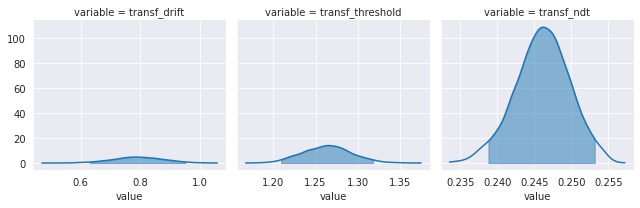

In [5]:
model_fit_ddm.plot_posteriors();

By default, 95% HDIs are shown, but you can also choose to have the posteriors without intervals or BCIs, and change the alpha level:

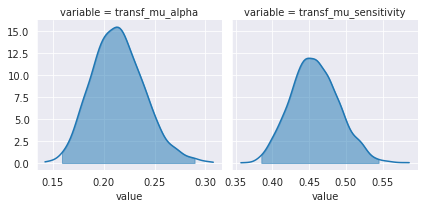

In [6]:
model_fit_rl.plot_posteriors(show_intervals='BCI', alpha_intervals=.01);

### Trial-level

Depending on the model specification, you can also extract certain trial-level parameters as numpy ordered dictionaries of n_samples X n_trials shape:

In [7]:
model_fit_ddm.trial_samples['drift_t'].shape

(4000, 400)

In [8]:
model_fit_ddm.trial_samples.keys()

dict_keys(['drift_t', 'threshold_t', 'ndt_t'])

In [9]:
model_fit_lba.trial_samples.keys() # for the LBA

dict_keys(['k_t', 'sp_trial_var_t', 'ndt_t', 'drift_cor_t', 'drift_inc_t', 'drift_trial_var', 'drift_variability_t'])

In the case of a RL model fit on choices alone, you can extract the log probability of accuracy=1 for each trial:

In [10]:
model_fit_rl.trial_samples.keys()

dict_keys(['log_p_t'])

In [11]:
model_fit_rl.trial_samples['log_p_t'].shape

(3000, 6464)

## Posterior predictives

With `get_posterior_predictives_df` you get posterior predictives as pandas DataFrames of `n_posterior_predictives` X `n_trials` shape:

In [12]:
pp = model_fit_rl.get_posterior_predictives_df(n_posterior_predictives=1000)
pp

variable accuracy                                               ...            \
trial        1    2    3    4    5    6    7    8    9    10    ... 6455 6456   
sample                                                          ...             
1               1    1    0    1    1    1    0    0    1    1  ...    0    1   
2               1    1    1    1    1    1    0    1    1    1  ...    0    1   
3               1    1    1    0    1    0    0    0    1    1  ...    0    1   
4               1    0    0    1    1    1    1    0    1    1  ...    1    0   
5               1    0    0    1    1    1    0    0    1    1  ...    0    1   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
996             1    0    0    1    1    1    1    0    1    1  ...    1    1   
997             0    0    1    1    1    1    0    0    1    1  ...    1    1   
998             1    1    0    1    1    1    0    0    1    1  ...    1    1   
999             1    1    1    1    1    1    0    0    1    1  ...    1    0   
1000            0    0    1    1    0    1    0    1    1    1  ...    0    1   

variable                                          
trial    6457 6458 6459 6460 6461 6462 6463 6464  
sample                                            
1           1    1    1    1    1    1    1    0  
2           1    0    1    0    1    0    1    1  
3           1    0    1    0    1    1    1    1  
4           1    1    1    1    1    0    0    0  
5           1    0    1    1    1    1    1    1  
...       ...  ...  ...  ...  ...  ...  ...  ...  
996         1    1    1    1    1    0    1    1  
997         0    0    1    0    1    1    0    1  
998         1    1    1    1    1    0    1    1  
999         1    1    1    0    1    0    1    1  
1000        1    0    1    1    1    1    1    1  

[1000 rows x 6464 columns]

For the DDM, you have additional parameters to tweak the DDM simulations, and you get a DataFrame with a hierarchical column index,  for RTs and for accuracy:

In [13]:
pp = model_fit_ddm.get_posterior_predictives_df(n_posterior_predictives=100, dt=.001)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         0.579328  0.307328  0.442328  0.450328  0.685328  0.495328   
2         0.589830  1.349830  1.107830  1.312830  1.418830  0.525830   
3         0.335740  0.335740  0.408740  0.395740  0.406740  0.754740   
4         0.469185  0.741185  0.410185  1.002185  0.442185  0.352185   
5         0.360828  0.579828  0.534828  0.453828  0.302828  0.440828   
...            ...       ...       ...       ...       ...       ...   
96        1.027233  0.620233  0.322233  0.319233  0.460233  1.063233   
97        0.294155  0.747155  0.590155  0.425155  0.395155  1.066155   
98        0.836374  0.749374  0.449374  0.784374  0.376374  0.500374   
99        0.539820  1.072820  0.399820  0.315820  0.571820  0.310820   
100       0.364635  0.683635  0.843635  0.759635  0.339635  0.699635   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      391  392  393  394   
sample                                            ...                           
1         0.562328  0.584328  0.328328  0.557328  ...      1.0  1.0  0.0  1.0   
2         0.492830  0.582830  0.702830  1.414830  ...      1.0  1.0  1.0  1.0   
3         0.323740  0.544740  0.672740  0.839740  ...      1.0  1.0  0.0  1.0   
4         1.940185  0.629185  0.828185  0.553185  ...      1.0  0.0  1.0  1.0   
5         0.876828  0.754828  0.615828  0.396828  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        0.812233  0.473233  0.907233  0.532233  ...      0.0  1.0  1.0  1.0   
97        0.401155  0.452155  0.465155  0.874155  ...      1.0  1.0  1.0  1.0   
98        1.025374  0.384374  0.439374  0.302374  ...      0.0  1.0  1.0  0.0   
99        0.284820  0.737820  0.489820  0.400820  ...      1.0  1.0  0.0  1.0   
100       0.623635  0.929635  0.564635  0.647635  ...      0.0  1.0  1.0  0.0   

variable                                
trial     395  396  397  398  399  400  
sample                                  
1         1.0  0.0  0.0  0.0  1.0  1.0  
2         0.0  1.0  0.0  1.0  0.0  1.0  
3         1.0  1.0  1.0  0.0  1.0  1.0  
4         1.0  0.0  1.0  0.0  1.0  1.0  
5         1.0  0.0  0.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  0.0  1.0  1.0  0.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  0.0  1.0  0.0  0.0  1.0  
99        1.0  0.0  0.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  0.0  0.0  

[100 rows x 800 columns]

You can also have posterior predictive summaries with `get_posterior_predictives_summary`.

Only mean accuracy for RL models fit on choices alone, and also mean RTs, skewness and quantiles for lower and upper boundaries for models fitted on RTs as well.

In [14]:
model_fit_rl.get_posterior_predictives_summary()

,mean_accuracy
sample,
1,0.797494
2,0.799969
3,0.794400
4,0.808787
5,0.797649
...,...
496,0.801052
497,0.807550
498,0.802444


In [15]:
model_fit_ddm.get_posterior_predictives_summary()

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.7000,0.603093,2.122648,0.367028,0.437728,0.542328,0.723928,1.095928,0.355328,0.434028,0.503828,0.604628,0.920528
2,0.7725,0.611410,3.040186,0.346830,0.414830,0.525830,0.695830,0.968830,0.339830,0.420630,0.524830,0.653030,1.008830
3,0.7275,0.686985,2.001093,0.368140,0.455540,0.558740,0.713740,1.022940,0.349740,0.460740,0.579740,0.781740,1.170740
4,0.7075,0.623600,1.327933,0.373385,0.449985,0.557185,0.712385,1.133385,0.336185,0.413585,0.516185,0.682185,1.016585
5,0.6600,0.616691,1.690637,0.350328,0.429828,0.549328,0.716328,1.036328,0.344828,0.430728,0.512828,0.662928,0.941228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.7500,0.633288,1.744174,0.360446,0.474046,0.550646,0.662546,0.990046,0.354346,0.440346,0.557646,0.689646,1.003046
497,0.7350,0.626251,1.708344,0.369431,0.459931,0.567431,0.734431,1.098431,0.364731,0.458231,0.525431,0.667831,1.014331
498,0.7525,0.650620,1.737055,0.377348,0.480748,0.591748,0.756348,1.205548,0.348748,0.424748,0.549748,0.690748,1.067748


You can also specify which quantiles you are interested in:

In [16]:
model_fit_lba.get_posterior_predictives_summary(n_posterior_predictives=200, quantiles=[.1, .5, .9])

/home/andrei/PycharmProjects/rlssm/rlssm/fit/fits_LBA.py:173: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=100
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_50_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_50_rt_correct,quant_90_rt_correct
sample,,,,,,,,,
1,0.829167,1.753300,0.174493,1.523816,1.728478,2.286540,1.153288,1.708179,2.391702
2,0.925000,1.636785,0.121633,1.702577,1.903884,2.165853,1.127508,1.562667,2.160312
3,0.775000,1.705099,0.228576,1.504233,1.821859,2.184460,1.044622,1.603953,2.409075
4,0.866667,1.821112,-0.005845,1.582099,1.861148,2.415493,1.112720,1.827975,2.453325
5,0.866667,1.735519,0.140312,1.443032,1.741435,2.307425,1.033040,1.722988,2.487626
...,...,...,...,...,...,...,...,...,...
96,0.854167,1.763710,0.150697,1.444318,1.808859,2.295962,1.106630,1.726433,2.449523
97,0.887500,1.723832,0.124932,1.529092,1.817219,2.078675,1.150373,1.674132,2.352047
98,0.937500,1.695637,0.030883,1.736310,1.914860,2.029197,1.125555,1.681367,2.250532


Finally, you can get summary for grouping variables (e.g., experimental conditions, trial blocks, etc.) in your data:

In [17]:
model_fit_lba.get_grouped_posterior_predictives_summary(n_posterior_predictives=200,
                                                        grouping_vars=['block_label'],
                                                        quantiles=[.3, .5, .7])

/home/andrei/PycharmProjects/rlssm/rlssm/fit/fits_LBA.py:173: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=100
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_label sample                                                             
1           1              0.8250  1.718735  0.172229               1.653732   
            2              0.9750  1.620113  0.171192               1.666122   
            3              0.8875  1.788441  0.289405               1.651215   
            4              0.9125  1.710564  0.297824               1.788257   
            5              0.9125  1.730842  0.078011               1.523436   
...                           ...       ...       ...                    ...   
3           96             0.8250  1.754408  0.095044               1.527736   
            97             0.8875  1.677931  0.135942               1.736514   
            98             0.9500  1.635251  0.190669               1.848763   
            99             0.9500  1.825450 -0.134695               2.210354   
            100            0.8375  1.721073  0.431813               1.589977   

                    quant_30_rt_correct  quant_50_rt_incorrect  \
block_label sample                                               
1           1                  1.338551               1.951279   
            2                  1.321811               1.681589   
            3                  1.468415               1.784749   
            4                  1.335879               2.104282   
            5                  1.442943               1.618799   
...                                 ...                    ...   
3           96                 1.426556               1.705102   
            97                 1.395131               1.825153   
            98                 1.250129               1.890923   
            99                 1.502201               2.238145   
            100                1.427311               1.625806   

                    quant_50_rt_correct  quant_70_rt_incorrect  \
block_label sample                                               
1           1                  1.632689               2.096885   
            2                  1.570161               1.697056   
            3                  1.665270               2.135992   
            4                  1.582917               2.234939   
            5                  1.715971               1.714907   
...                                 ...                    ...   
3           96                 1.768600               1.802312   
            97                 1.614284               1.872564   
            98                 1.543695               1.944683   
            99                 1.774805               2.264940   
            100                1.604059               1.875737   

                    quant_70_rt_correct  
block_label sample                       
1           1                  1.984132  
            2                  1.896569  
            3                  2.033820  
            4                  1.989770  
            5                  2.049910  
...                                 ...  
3           96                 2.085204  
            97                 1.876648  
            98                 1.888064  
            99                 2.163013  
            100                1.873138  

[300 rows x 9 columns]

## Plot posterior predictives

You can plot posterior predictives similarly, both **ungrouped** (across all trials) or **grouped** (across conditions, trial blocks, etc.plot_mean_posterior_predictives).

For RT models, you have both **mean plots**, and **quantile plots**:

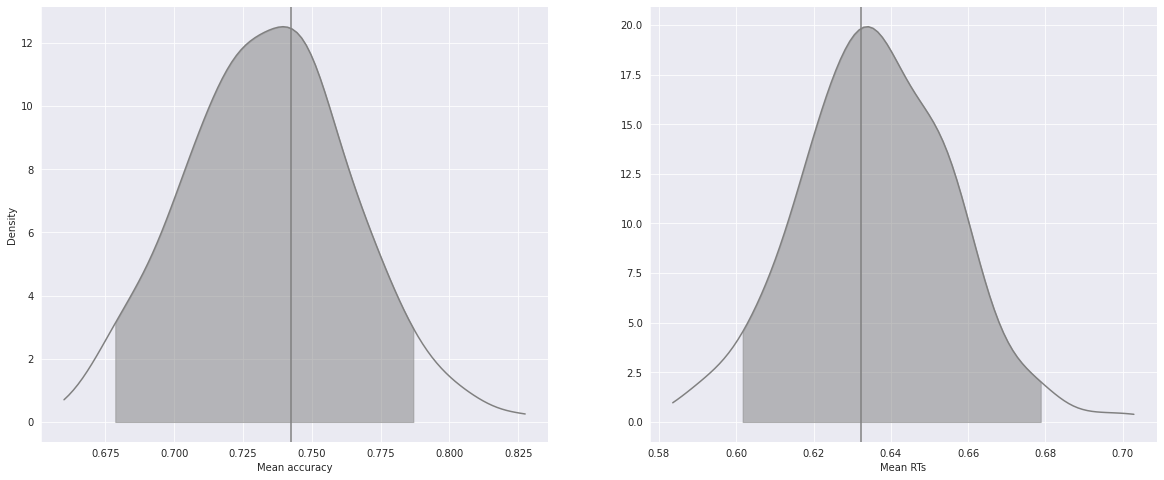

In [18]:
model_fit_ddm.plot_mean_posterior_predictives(n_posterior_predictives=200);

Quantile plots have 2 main visualization options, "shades" and "lines", and you can specify again which quantiles you want, which in tervals and alpha levels: 

/home/andrei/PycharmProjects/rlssm/rlssm/fit/fits_LBA.py:173: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=100
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


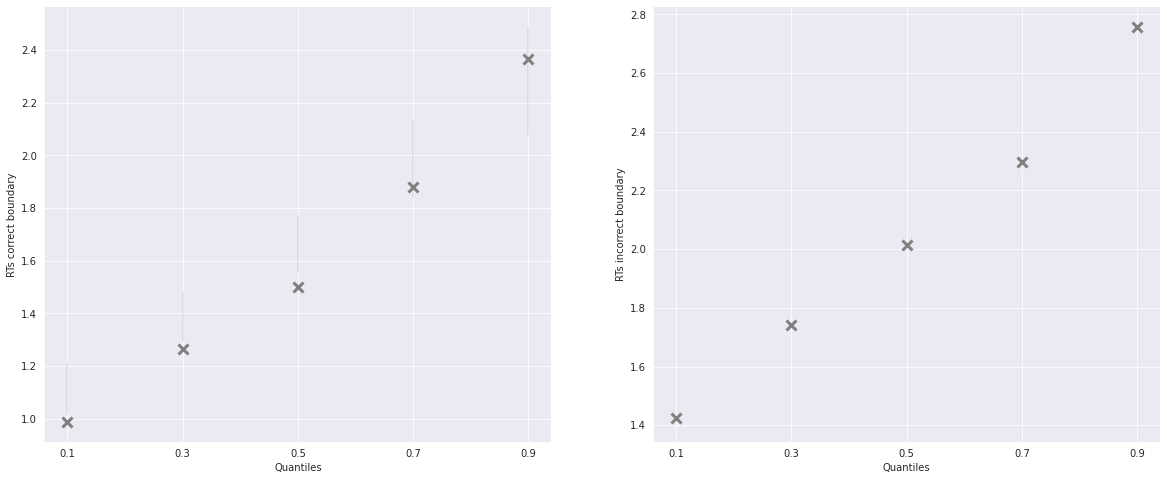

In [19]:
model_fit_lba.plot_quantiles_posterior_predictives(n_posterior_predictives=200);

/home/andrei/PycharmProjects/rlssm/rlssm/fit/fits_LBA.py:173: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=100
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


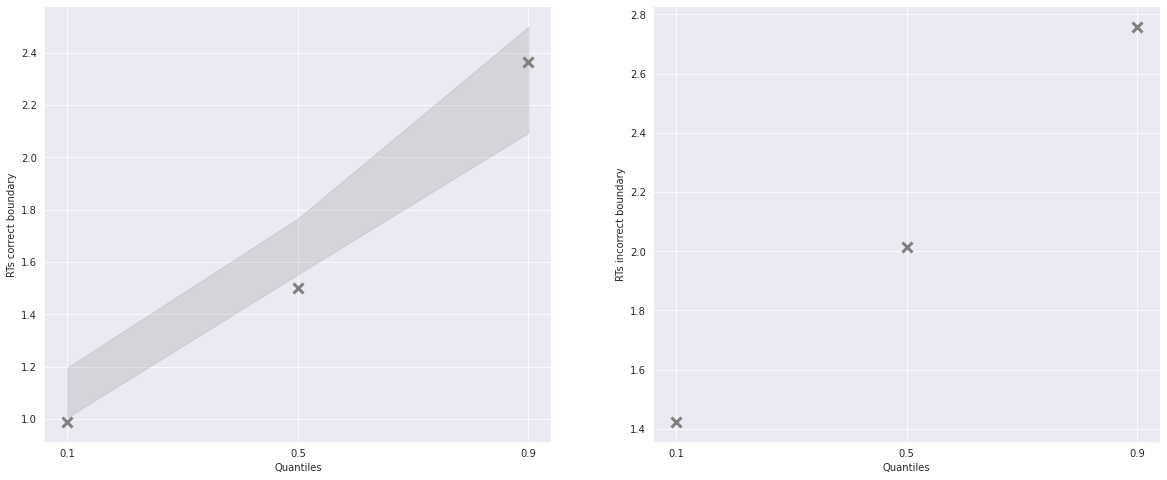

In [20]:
model_fit_lba.plot_quantiles_posterior_predictives(n_posterior_predictives=200,
                                                   kind='shades',
                                                   quantiles=[.1, .5, .9]);

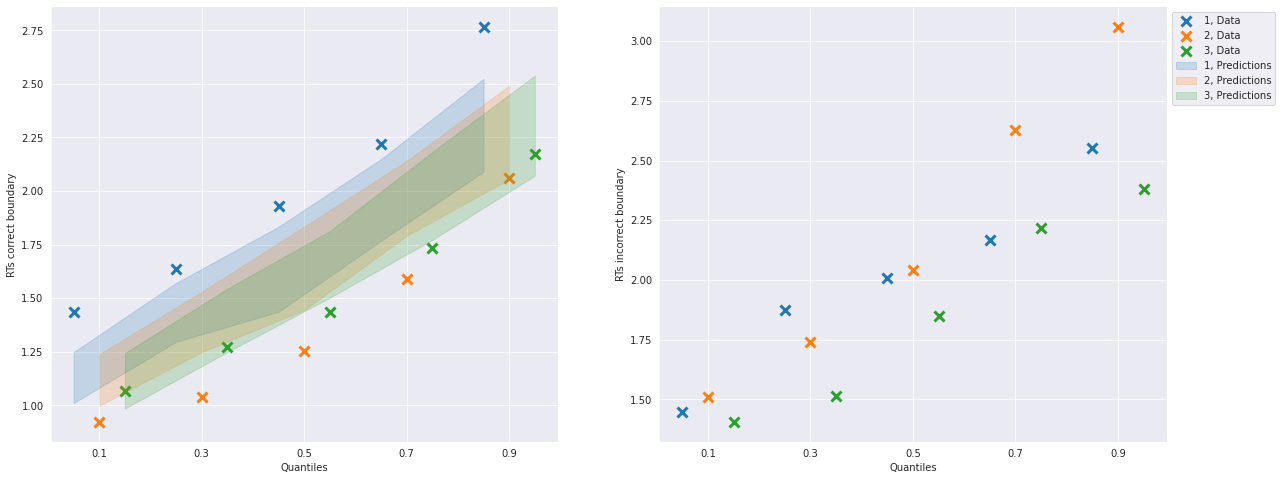

In [21]:
model_fit_lba.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='block_label',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [22]:
# Define new grouping variables:

import pandas as pd
import numpy as np

data = model_fit_rl.data_info['data']

# add a column to the data to group trials across learning blocks
data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

# add a column to define which choice pair is shown in that trial
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

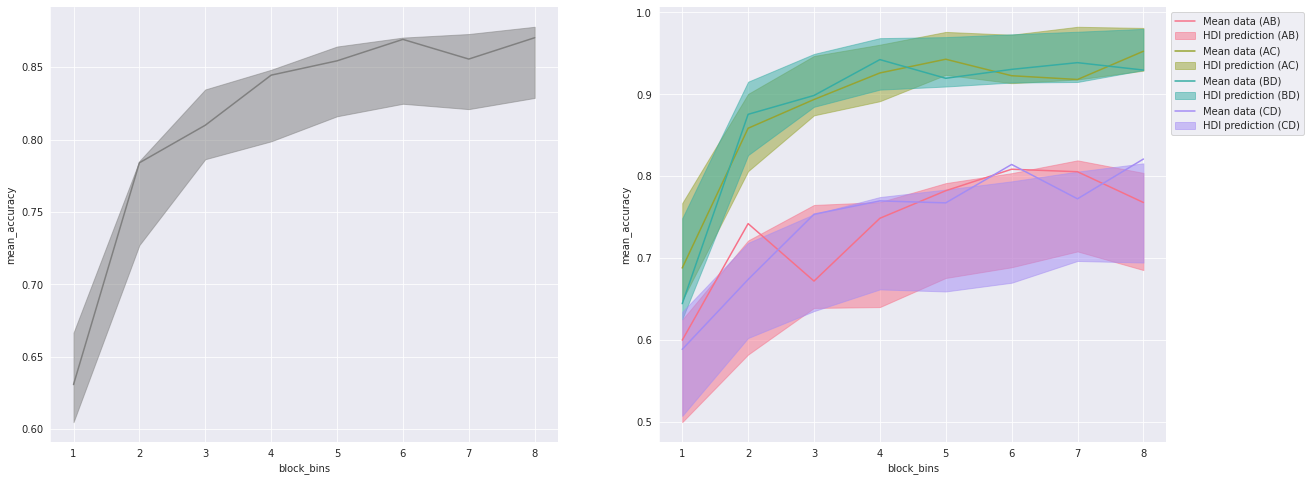

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20,8))

model_fit_rl.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit_rl.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                     n_posterior_predictives=500, ax=axes[1])

sns.despine()